# K-Means Clustering Example

Let's make some fake data that includes people clustered by income and age, randomly:

In [5]:
from numpy import random, array

#Create fake income/age clusters for N people in k clusters
def createClusteredData(N, k):
    random.seed(10)
    pointsPerCluster = float(N)/k
    X = []
    for i in range (k):
        incomeCentroid = random.uniform(20000.0, 200000.0) #Random centroid
        ageCentroid = random.uniform(20.0, 70.0)
        for j in range(int(pointsPerCluster)):
            X.append([random.normal(incomeCentroid, 10000.0), random.normal(ageCentroid, 2.0)]) #Adds (x,y) as X
            #np.random.normal(x,std,size)
    X = array(X)
    return X

We'll use k-means to rediscover these clusters in unsupervised learning:

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


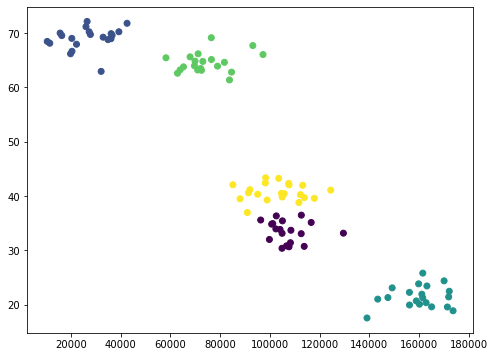

In [29]:
%matplotlib inline

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from numpy import random, float

data = createClusteredData(100, 5) #100 people with 5 clusters

model = KMeans(n_clusters=5)

# Note I'm scaling the data to normalize it! Important for good results since K-Means is looking for distance.
model = model.fit(scale(data)) #KMeans(n_clusters=5).fit(data)

# We can look at the clusters each data point was assigned to
print(model.labels_)


# And we'll visualize it:
plt.figure(figsize=(8, 6)) #size of figure
plt.scatter(data[:,0], data[:,1], c=model.labels_)
#data[:,0] ->all rows from column 0
#c=models.labels_  ->assigns different color for each
plt.show()

## Activity

Things to play with: what happens if you don't scale the data? What happens if you choose different values of K? In the real world, you won't know the "right" value of K to start with - you'll need to converge on it yourself.